# ***We will train 3 types of Models***

- Statistical ML Model
- Decision Tree Ensemble type Model
- Neural Network Model

## Statistical Model

Precision: 0.78
Recall: 0.41
F1 Score: 0.54
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       250
           1       0.78      0.41      0.54        44

    accuracy                           0.89       294
   macro avg       0.84      0.69      0.74       294
weighted avg       0.89      0.89      0.88       294



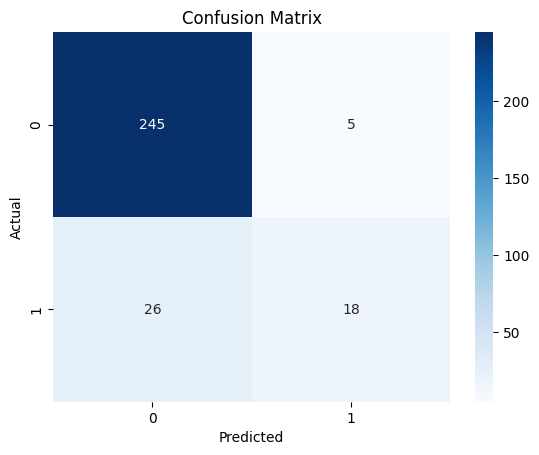

Training Score: 0.90
Validation Score: 0.89
The model generalizes well.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed data
train_df = pd.read_csv('../data/train_data.csv')
test_df = pd.read_csv('../data/test_data.csv')
cv_data = pd.read_csv('../data/cv_data.csv')

# Combine train and cv data for training
train_df = pd.concat([train_df, cv_data, test_df], axis=0)

# Specify the target and features
target = 'Attrition'  
features = train_df.columns.drop(target)

# Split the data into features and target
X = train_df[features]
y = train_df[target]
# print(y)
y = np.where(y == 'Yes', 1, 0)
# print(y)


# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Detailed classification report
print(classification_report(y_val, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Check for generalization and bias
train_score = model.score(X_train, y_train)
val_score = model.score(X_val, y_val)

print(f'Training Score: {train_score:.2f}')
print(f'Validation Score: {val_score:.2f}')

if abs(train_score - val_score) < 0.05:
    print("The model generalizes well.")
else:
    print("The model may be overfitting or underfitting")

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


c:\Users\debop\Desktop\Data Science\IBM Attrition Predictor\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 15, 'n_estimators': 200, 'subsample': 0.8}


c:\Users\debop\Desktop\Data Science\IBM Attrition Predictor\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Precision: 0.71
Validation Recall: 0.44
Validation F1 Score: 0.55
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       284
           1       0.71      0.44      0.55        54

    accuracy                           0.88       338
   macro avg       0.80      0.70      0.74       338
weighted avg       0.87      0.88      0.87       338



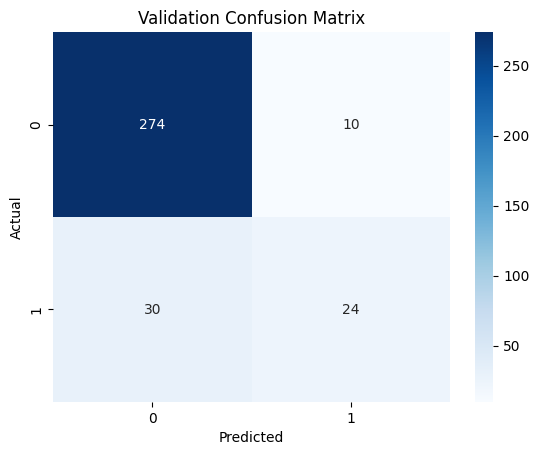

Training Score: 1.00
Validation Score: 0.88
The model may be overfitting or underfitting.
Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
 

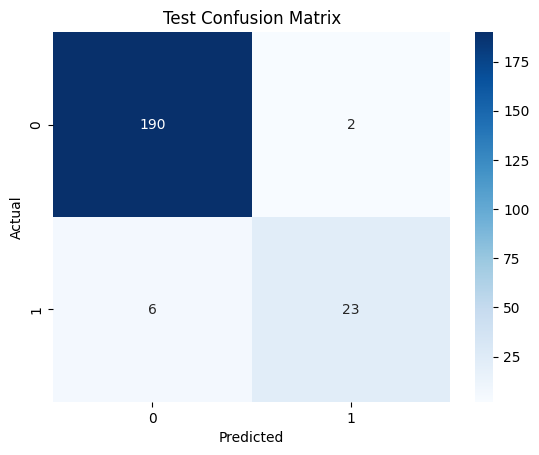

In [2]:
from xgboost import XGBClassifier


# Combine train and cv data for training
train_df = pd.concat([train_df, cv_data], axis=0)

# Specify the target and features
target = 'Attrition'  
features = train_df.columns.drop(target)

# Split the data into features and target
X = train_df[features]
y = train_df[target]
y = np.where(y == 'Yes', 1, 0)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [15, 30, 45],
    'subsample': [0.5, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.8, 1.0]
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

# Train the XGBoost model with the best hyperparameters
best_xgb_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
best_xgb_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = best_xgb_model.predict(X_val)

# Evaluate the model on the validation set
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)

print(f'Validation Precision: {precision:.2f}')
print(f'Validation Recall: {recall:.2f}')
print(f'Validation F1 Score: {f1:.2f}')

# Detailed classification report
print(classification_report(y_val, y_val_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_val_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Validation Confusion Matrix')
plt.show()

# Check for generalization and bias
train_score = best_xgb_model.score(X_train, y_train)
val_score = best_xgb_model.score(X_val, y_val)

print(f'Training Score: {train_score:.2f}')
print(f'Validation Score: {val_score:.2f}')

if abs(train_score - val_score) < 0.05:
    print("The model generalizes well.")
else:
    print("The model may be overfitting or underfitting.")

print(test_df.columns)
# Predict on the test set
X_test = test_df[features]
y_test = test_df[target]
y_test = np.where(y_test == 'Yes', 1, 0)
y_test_pred = best_xgb_model.predict(X_test)

# Evaluate the model on the test set
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print(f'Test Precision: {precision_test:.2f}')
print(f'Test Recall: {recall_test:.2f}')
print(f'Test F1 Score: {f1_test:.2f}')

# Detailed classification report
print(classification_report(y_test, y_test_pred))

# Confusion matrix
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Test Confusion Matrix')
plt.show()